# Census Income Classification
This notebook uses the Census Income dataset available from the <a href = 'http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a><br>
The model aims to predict if someone earns more than $50K based on continuous and categorical variables in the dataset.

## Dataset

The full dataset has 48,842 entries. For this model the dataset has only 30,000 entries after cleaning. 

The cleaned dataset and model is credited to Jose Portilla Udemy.

Each entry contains the following information about an individual:
* <strong>age</strong>: the age of an individual as an integer from 18 to 90 (continuous)
* <strong>sex</strong>: Male or Female (categorical)
* <strong>education</strong>: represents the highest level of education achieved by an individual (categorical)
* <strong>education_num</strong>: represents education as an integer from 3 to 16 (categorical)
<div><table style="display: inline-block">
<tr><td>3</td><td>5th-6th</td><td>8</td><td>12th</td><td>13</td><td>Bachelors</td></tr>
<tr><td>4</td><td>7th-8th</td><td>9</td><td>HS-grad</td><td>14</td><td>Masters</td></tr>
<tr><td>5</td><td>9th</td><td>10</td><td>Some-college</td><td>15</td><td>Prof-school</td></tr>
<tr><td>6</td><td>10th</td><td>11</td><td>Assoc-voc</td><td>16</td><td>Doctorate</td></tr>
<tr><td>7</td><td>11th</td><td>12</td><td>Assoc-acdm</td></tr>
</table></div>
* <strong>marital-status</strong>: marital status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Married</td><td>Divorced</td><td>Married-spouse-absent</td></tr>
<tr><td>Separated</td><td>Widowed</td><td>Never-married</td></tr>
</table></div>
* <strong>workclass</strong>: a general term to represent the employment status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Local-gov</td><td>Private</td></tr>
<tr><td>State-gov</td><td>Self-emp</td></tr>
<tr><td>Federal-gov</td></tr>
</table></div>
* <strong>occupation</strong>: the general type of occupation of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Adm-clerical</td><td>Handlers-cleaners</td><td>Protective-serv</td></tr>
<tr><td>Craft-repair</td><td>Machine-op-inspct</td><td>Sales</td></tr>
<tr><td>Exec-managerial</td><td>Other-service</td><td>Tech-support</td></tr>
<tr><td>Farming-fishing</td><td>Prof-specialty</td><td>Transport-moving</td></tr>
</table></div>
* <strong>hours-per-week</strong>: the hours an individual has reported to work per week as an integer from 20 to 90 (continuous)
* <strong>income</strong>: whether or not an individual makes more than \\$50,000 annually (label)
* <strong>label</strong>: income represented as an integer (0: <=\\$50K, 1: >\\$50K) (optional label)

## Import Dependencies

In [11]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
from sklearn.utils import shuffle
%matplotlib inline

df = pd.read_csv('../Data/income.csv')

In [6]:
df.shape

(30000, 10)

In [7]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30000 non-null  int64 
 1   sex             30000 non-null  object
 2   education       30000 non-null  object
 3   education-num   30000 non-null  int64 
 4   marital-status  30000 non-null  object
 5   workclass       30000 non-null  object
 6   occupation      30000 non-null  object
 7   hours-per-week  30000 non-null  int64 
 8   income          30000 non-null  object
 9   label           30000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


In [26]:
df.describe()

,age,education-num,hours-per-week,label
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,37.144100,10.280133,41.384033,0.276667
std,12.856173,2.479556,9.684555,0.447358
min,18.000000,3.000000,20.000000,0.000000
25%,26.000000,9.000000,40.000000,0.000000
50%,36.000000,10.000000,40.000000,0.000000
75%,46.000000,13.000000,45.000000,1.000000
max,90.000000,16.000000,90.000000,1.000000


In [9]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

In [10]:
# Drop the column not interested in for this exercise
df.drop(columns = "income",axis = 1, inplace = True)

## Exploratory Analysis and Visualisation

### Sex of individual

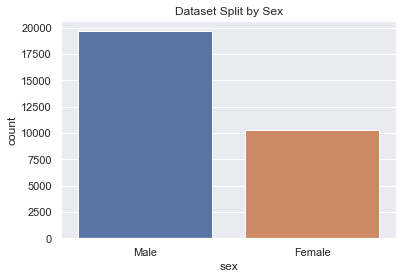

In [14]:
sns.countplot(data = df, x = "sex")
plt.title("Dataset Split by Sex");

In [28]:
df["sex"].value_counts()

Male      19671
Female    10329
Name: sex, dtype: int64

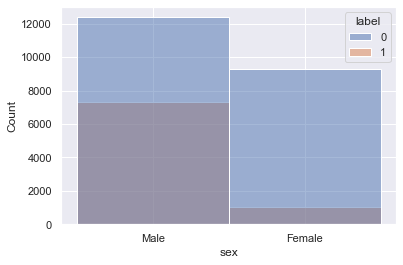

In [24]:
sns.histplot(x="sex", hue = "label", stat = "count",data=df);

* there are more males than females in the dataset
* proportionally less females are making more than $50k per annum

### Age

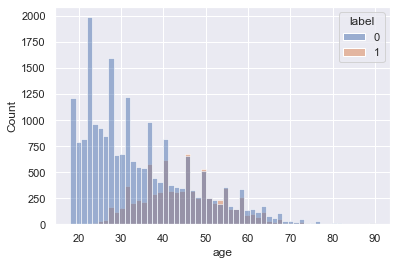

In [36]:
sns.histplot(x="age", hue = "label", stat = "count",data=df);

* the age distribution is positively skewed with quite a few people over the working age of 65
* there are interesting peaks at certain ages
* those paid over 50k tend to be older than those paid less than 50k

### Education level

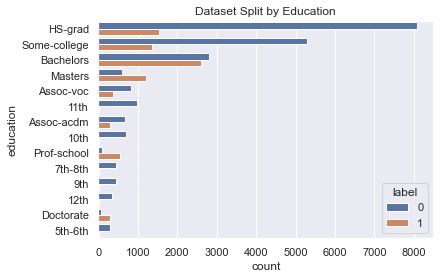

In [41]:
sns.countplot(data = df, y = "education", order = df['education'].value_counts().index, hue = 'label')
plt.title("Dataset Split by Education");

* most people have a high school education or degree
* those earning more than 50k tend to have at least a high school education

### Marital status

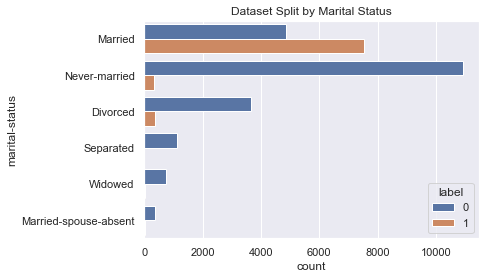

In [44]:
sns.countplot(data = df, y = "marital-status", order = df['marital-status'].value_counts().index, hue = 'label')
plt.title("Dataset Split by Marital Status");

* married people more likely to earn over 50k whereas those never married have the largest proportion paid below 50k

### Workclass

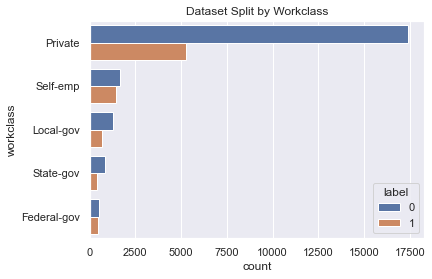

In [47]:
sns.countplot(data = df, y = "workclass", order = df['workclass'].value_counts().index, hue = 'label')
plt.title("Dataset Split by Workclass");

* most people in the data work for private companies
* proportionally more self-employed and federal government employees earn more than 50k of the total self-employed

### Occupation

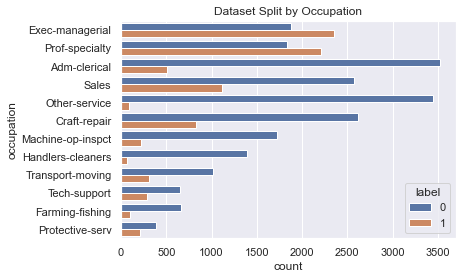

In [48]:
sns.countplot(data = df, y = "occupation", order = df['occupation'].value_counts().index, hue = 'label')
plt.title("Dataset Split by Occupation");

* the proportion of those earning more than 50k is higher in the managerial and speciality occupations than clerical, sales etc

In [49]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

### Hours worked per week

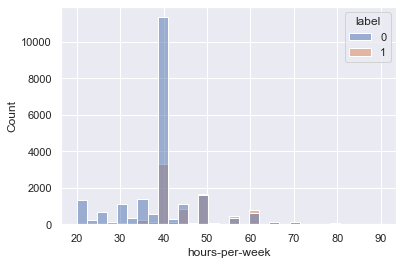

In [54]:
sns.histplot(x="hours-per-week", stat = "count",data=df, bins = 30, hue = 'label');

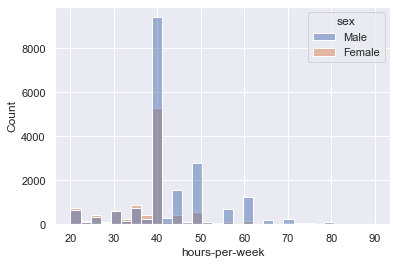

In [55]:
sns.histplot(x="hours-per-week", stat = "count",data=df, bins = 30, hue = 'sex');

* the vast majority of people work 40 hours per week
* those working more than 40 hours a week tend to earn more than 50k whereas those working less tend to earn less (as expected)
* of those working 40 hours the split between male and female is roughly the same 
* hours over 40 are dominated by men and those under 40 (part-time) are mostly women

###  Separate continuous, categorical and label column names

In [4]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [103]:
# Separate into categorical and continuous
cat_cols = ['sex','education','marital-status','workclass','occupation']
cont_cols = ['age','hours-per-week']
y_col = ['label']

print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


### Convert categorical columns to category dtypes

In [58]:
# Convert category columns to category variable type
for cat in cat_cols:
    df[cat] = df[cat].astype('category')


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30000 non-null  int64   
 1   sex             30000 non-null  category
 2   education       30000 non-null  category
 3   education-num   30000 non-null  int64   
 4   marital-status  30000 non-null  category
 5   workclass       30000 non-null  category
 6   occupation      30000 non-null  category
 7   hours-per-week  30000 non-null  int64   
 8   income          30000 non-null  object  
 9   label           30000 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 1.3+ MB


### Shuffle the dataset

In [60]:
# Shuffle
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,23,Female,HS-grad,9,Never-married,Private,Other-service,50,<=50K,0
1,37,Female,Prof-school,15,Married,State-gov,Prof-specialty,39,>50K,1
2,34,Male,Some-college,10,Divorced,Private,Adm-clerical,40,<=50K,0
3,31,Male,HS-grad,9,Married,Private,Craft-repair,40,>50K,1
4,20,Female,Some-college,10,Never-married,Private,Sales,25,<=50K,0


### Set the embedding sizes

In [61]:
# Create a variable of the number of categorical categories
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
cat_szs # returns the sizes of each category

[2, 14, 6, 5, 12]

In [62]:
# create embedding sizes
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs] # divide the number of entries by 2 to a max of 50
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

### Create an array of categorical values

In [71]:
cat_cols

['sex', 'education', 'marital-status', 'workclass', 'occupation']

In [74]:
# Get the category values for each categorical variable

sex = df['sex'].cat.codes.values
ed = df['education'].cat.codes.values
mar = df['marital-status'].cat.codes.values
work = df['workclass'].cat.codes.values
occ = df['occupation'].cat.codes.values

# create numpy array which is a stack of each categorical column
cats = np.stack([sex,ed,mar,work,occ], 1)
cats[:5]

array([[ 0, 10,  3,  2,  6],
       [ 0, 12,  1,  4,  7],
       [ 1, 13,  0,  2,  0],
       [ 1, 10,  1,  2,  1],
       [ 0, 13,  3,  2,  9]], dtype=int8)

### Convert "cats" to a tensor

In [75]:
# Convert to tensor
cats = torch.tensor(cats, dtype=torch.int64) # source data is an array, not an existing tensor so method used
cats[:5]

tensor([[ 0, 10,  3,  2,  6],
        [ 0, 12,  1,  4,  7],
        [ 1, 13,  0,  2,  0],
        [ 1, 10,  1,  2,  1],
        [ 0, 13,  3,  2,  9]])

### Create an array of continuous values

In [77]:
# Convert continuous variables to a combined tensor also
conts = np.stack([df[col].values for col in cont_cols], 1)

# RUN THIS CODE TO COMPARE RESULTS
conts[:5]

array([[23, 50],
       [37, 39],
       [34, 40],
       [31, 40],
       [20, 25]], dtype=int64)

### Convert "conts" to a tensor

In [79]:
# Create tensor using torch
conts = torch.tensor(conts, dtype=torch.float)

conts.dtype

C:\Users\imoge\AppData\Local\Temp/ipykernel_29364/842472830.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  conts = torch.tensor(conts, dtype=torch.float)


torch.float32

### Create a label tensor

In [80]:
# Convert labels to tensor (flatten to get values in shape required)
y = torch.tensor(df[y_col].values).flatten()
y[:5]

tensor([0, 1, 0, 1, 0])

### Create train and test sets

In [81]:
# CODE HERE
b = 30000 # batch size
t = 5000  # test size

# Set batch size and train test seizes
batch_size = 30000 # one batch of 30000
test_size = int(batch_size * .2) 

cat_train = cats[:batch_size-test_size] # split the categorical and continuous training and tests as they are separate
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [83]:
print(y_train.shape,y_test.shape)

torch.Size([24000]) torch.Size([6000])


### Define the model class
Credit to Jose Portilla - Udemy

In [94]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        # Call the parent __init__
        super().__init__()
        
        # Set up the embedding, dropout, and batch normalization layer attributes
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        # Assign a variable to hold a list of layers
        layerlist = []
        
        # Assign a variable to store the number of embedding and continuous layers
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        # Iterate through the passed-in "layers" parameter (ie, [200,100]) to build a list of layers
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        # Convert the list of layers into an attribute
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        # Extract embedding values from the incoming categorical data
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        # Perform an initial dropout on the embeddings
        x = self.emb_drop(x)
        
        # Normalize the incoming continuous data
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        
        # Set up model layers
        x = self.layers(x)
        return x

### Set the random seed

In [95]:
# Set seed
torch.manual_seed(33)

### Create a TabularModel instance
Create an instance called "model" with one hidden layer containing 50 neurons and a dropout layer p-value of 0.4

In [96]:
# Create model
model = TabularModel(emb_szs, conts.shape[1], 2, [50], p=0.4) 
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

### Define the loss and optimization functions
Create a loss function called "criterion" using CrossEntropyLoss<br>
Create an optimization function called "optimizer" using Adam, with a learning rate of 0.001

In [97]:
# Set loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Train the model
Run the cell below to train the model through 300 epochs. 

Code credit to Jose Portilla - Udemy

In [98]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.81416464
epoch:  26  loss: 0.59320545
epoch:  51  loss: 0.51328987
epoch:  76  loss: 0.46052682
epoch: 101  loss: 0.42783952
epoch: 126  loss: 0.39731872
epoch: 151  loss: 0.38067204
epoch: 176  loss: 0.35840076
epoch: 201  loss: 0.34474680
epoch: 226  loss: 0.33552343
epoch: 251  loss: 0.32678667
epoch: 276  loss: 0.32285362
epoch: 300  loss: 0.31560463

Duration: 8 seconds


### 13. Plot the Cross Entropy Loss against epochs
Results may vary. The shape of the plot is what matters.

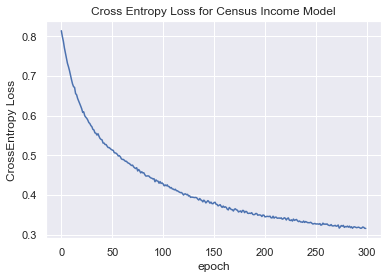

In [105]:
# Plot the loss

plt.plot(range(epochs), losses)
plt.title("Cross Entropy Loss for Census Income Model")
plt.ylabel('CrossEntropy Loss')
plt.xlabel('epoch');


### Evaluate the test set
With torch set to <tt>no_grad</tt>, pass <tt>cat_test</tt> and <tt>con_test</tt> through the trained model. Create a validation set called "y_val". Compare the output to <tt>y_test</tt> using the loss function defined above. 

In [100]:
# Run the test set through the model and evaluate the loss
with torch.no_grad(): # switch off the autograd that stores gradients as predicting
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)

# RUN THIS CODE TO COMPARE RESULTS
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.32981849


### Calculate the overall percent accuracy
Using a for loop, compare the argmax values of the <tt>y_val</tt> validation set to the <tt>y_test</tt> set.

In [101]:
# Compare actual to predicted values
rows = 5000
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1

        print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 1.2551, -0.5784])    0      0   
tensor([ 2.7425, -2.9003])    0      0   
tensor([-0.5106,  0.1712])    1      1   
tensor([-0.6032,  0.8072])    1      1   
tensor([-0.7872,  0.3021])    1      1   
tensor([ 1.0308, -2.1780])    0      0   
tensor([ 2.0723, -2.5579])    0      0   
tensor([ 3.6388, -2.8012])    0      0   
tensor([-0.9436,  0.0411])    1      0   
tensor([ 2.1423, -3.2552])    0      0   
tensor([ 0.1402, -0.2733])    0      0   
tensor([ 0.3524, -0.9991])    0      0   
tensor([-0.8611,  1.0618])    1      0   
tensor([-1.1211,  0.0546])    1      0   
tensor([ 2.2008, -0.8897])    0      0   
tensor([ 2.4655, -4.4146])    0      0   
tensor([ 2.6759, -1.9436])    0      0   
tensor([-0.2577,  0.0495])    1      1   
tensor([ 2.3811, -2.2620])    0      0   
tensor([ 3.1627, -3.7629])    0      0   
tensor([ 4.3572, -2.8408])    0      0   
tensor([-0.6063, -0.2172])    1      1   
tensor([ 1.3360, -1.7863])    0   

tensor([ 0.1140, -0.6602])    0      0   
tensor([-0.0800, -0.4367])    0      0   
tensor([-1.5315,  2.0614])    1      1   
tensor([ 1.0373, -1.6926])    0      0   
tensor([ 0.1882, -0.2242])    0      0   
tensor([-0.8678,  0.1636])    1      1   
tensor([ 2.1068, -1.9230])    0      0   
tensor([-0.0128, -0.6059])    0      0   
tensor([ 3.3978, -3.9544])    0      0   
tensor([ 0.2341, -0.9701])    0      0   
tensor([ 1.6754, -1.6739])    0      0   
tensor([-0.0456,  0.4279])    1      0   
tensor([ 2.9669, -3.9818])    0      0   
tensor([ 0.3901, -0.7930])    0      1   
tensor([ 5.5559, -3.5143])    0      0   
tensor([ 2.0602, -1.1498])    0      0   
tensor([ 1.4798, -1.3569])    0      0   
tensor([ 3.9957, -3.6220])    0      0   
tensor([ 2.0065, -1.8680])    0      0   
tensor([ 3.4541, -3.1306])    0      0   
tensor([ 2.4038, -1.2258])    0      0   
tensor([ 0.0634, -0.2045])    0      1   
tensor([ 1.3728, -1.5507])    0      0   
tensor([-0.8711,  0.2095])    1   

tensor([-0.6199,  0.0526])    1      1   
tensor([-1.2637,  0.2970])    1      1   
tensor([ 0.8528, -0.7295])    0      1   
tensor([ 2.7677, -2.6955])    0      0   
tensor([ 0.0410, -0.1440])    0      0   
tensor([ 2.3961, -3.4989])    0      0   
tensor([ 1.9959, -1.7856])    0      0   
tensor([ 0.0854, -0.4803])    0      0   
tensor([ 1.3883, -1.1179])    0      0   
tensor([ 1.5295, -1.5602])    0      0   
tensor([ 1.2872, -0.1592])    0      0   
tensor([-0.1685, -1.2228])    0      0   
tensor([ 1.9881, -2.5294])    0      0   
tensor([-0.3696,  1.0117])    1      0   
tensor([ 0.4502, -0.7690])    0      0   
tensor([-0.8122,  1.6975])    1      1   
tensor([-0.6302, -0.0913])    1      0   
tensor([ 1.3480, -1.7772])    0      0   
tensor([0.4263, 0.1545])      0      0   
tensor([-0.1434, -1.1765])    0      0   
tensor([ 1.5343, -0.9817])    0      0   
tensor([ 2.6322, -2.5815])    0      0   
tensor([ 0.7468, -1.3246])    0      0   
tensor([ 2.8582, -2.4807])    0   

tensor([ 2.9706, -3.5572])    0      0   
tensor([ 1.1227, -1.0477])    0      0   
tensor([-0.0992, -0.7378])    0      1   
tensor([ 4.1608, -3.1079])    0      0   
tensor([-0.5396,  1.0299])    1      1   
tensor([-0.8525,  1.1613])    1      1   
tensor([ 1.2231, -1.5539])    0      0   
tensor([-0.8211,  0.1619])    1      1   
tensor([ 0.5434, -1.0699])    0      1   
tensor([-0.0881, -0.4055])    0      1   
tensor([ 1.1484, -0.9235])    0      0   
tensor([-0.7997,  1.5102])    1      0   
tensor([-1.1400,  1.3846])    1      1   
tensor([ 2.0451, -2.4117])    0      0   
tensor([-0.1178,  0.4345])    1      1   
tensor([ 1.4492, -1.2675])    0      0   
tensor([ 3.0758, -2.1517])    0      0   
tensor([ 1.6185, -1.8940])    0      0   
tensor([ 2.7365, -2.3975])    0      0   
tensor([ 2.8409, -1.3807])    0      0   
tensor([ 1.5005, -1.2538])    0      0   
tensor([ 0.8662, -0.8534])    0      0   
tensor([ 2.3929, -2.1731])    0      0   
tensor([ 2.5838, -1.8599])    0   

tensor([ 0.9896, -1.3314])    0      0   
tensor([-0.6239,  0.1839])    1      0   
tensor([ 2.0752, -2.6659])    0      0   
tensor([-0.2028,  0.0950])    1      1   
tensor([ 1.7768, -1.4942])    0      0   
tensor([ 1.4078, -1.5014])    0      0   
tensor([ 2.0226, -2.6612])    0      0   
tensor([ 0.6778, -1.2934])    0      0   
tensor([ 1.9324, -1.8591])    0      0   
tensor([ 1.7250, -2.5107])    0      0   
tensor([-0.2573,  0.8414])    1      1   
tensor([ 0.3645, -0.5746])    0      1   
tensor([-0.2301, -0.8815])    0      1   
tensor([-0.4739,  0.2317])    1      1   
tensor([-1.0599,  0.4909])    1      0   
tensor([ 4.6803, -4.6916])    0      0   
tensor([-1.3171,  0.6407])    1      1   
tensor([ 2.2595, -2.3980])    0      0   
tensor([ 0.2197, -0.4207])    0      0   
tensor([-0.5923, -0.1075])    1      1   
tensor([-0.6829,  1.4660])    1      1   
tensor([-0.0597, -0.3127])    0      1   
tensor([ 2.5406, -1.7616])    0      0   
tensor([-0.7866,  1.0151])    1   

tensor([ 5.4304, -4.1972])    0      0   
tensor([ 6.4572, -5.8611])    0      0   
tensor([ 1.7409, -2.8530])    0      0   
tensor([-0.5082, -0.0789])    1      1   
tensor([ 2.9071, -3.6842])    0      0   
tensor([-0.1061, -0.7355])    0      0   
tensor([ 2.1497, -1.3309])    0      0   
tensor([ 1.5516, -1.8099])    0      0   
tensor([ 0.9549, -0.3743])    0      0   
tensor([ 1.7265, -2.8114])    0      0   
tensor([ 1.0764, -1.4337])    0      0   
tensor([ 1.6667, -1.9316])    0      0   
tensor([0.7283, 1.0316])      1      1   
tensor([ 4.5704, -2.9814])    0      0   
tensor([ 0.7429, -0.6869])    0      0   
tensor([-0.4795,  1.4845])    1      0   
tensor([ 1.7355, -2.3122])    0      0   
tensor([ 0.7334, -2.0938])    0      0   
tensor([ 2.8867, -1.4887])    0      0   
tensor([ 3.5353, -2.9042])    0      0   
tensor([ 2.2175, -3.2347])    0      0   
tensor([-0.4359,  0.3906])    1      1   
tensor([ 2.8633, -2.8593])    0      0   
tensor([-1.0625, -0.0582])    1   

tensor([ 1.9944, -2.6634])    0      0   
tensor([-0.3382,  0.1705])    1      1   
tensor([ 0.7639, -1.5877])    0      1   
tensor([ 1.7407, -1.0693])    0      0   
tensor([-1.1614,  1.4336])    1      1   
tensor([ 0.7341, -0.7654])    0      0   
tensor([ 3.8892, -2.6423])    0      0   
tensor([ 1.6004, -1.8246])    0      0   
tensor([-0.5399,  0.4354])    1      1   
tensor([ 2.5103, -0.7032])    0      0   
tensor([ 0.1639, -0.5691])    0      1   
tensor([ 3.2238, -3.5020])    0      0   
tensor([ 0.2636, -1.7698])    0      1   
tensor([ 2.1815, -2.0826])    0      0   
tensor([-0.5463,  0.0290])    1      1   
tensor([-0.7607,  1.6387])    1      1   
tensor([ 2.8342, -2.6184])    0      0   
tensor([ 1.7269, -1.6701])    0      0   
tensor([ 1.7771, -2.6141])    0      0   
tensor([ 3.0601, -3.3470])    0      0   
tensor([-0.8246,  1.5150])    1      1   
tensor([ 1.6738, -1.3769])    0      0   
tensor([ 1.5027, -1.0294])    0      0   
tensor([ 1.0833, -1.1381])    0   

tensor([ 0.9672, -2.8288])    0      0   
tensor([ 2.2224, -1.4513])    0      0   
tensor([ 2.5597, -3.1734])    0      0   
tensor([ 0.4800, -1.3095])    0      0   
tensor([ 1.1765, -0.8293])    0      0   
tensor([ 0.3803, -0.6113])    0      0   
tensor([-0.2814, -0.1947])    1      1   
tensor([-0.6768, -0.0910])    1      1   
tensor([-0.9079,  0.5645])    1      1   
tensor([ 1.2995, -1.7128])    0      1   
tensor([-0.3387,  0.1480])    1      1   
tensor([-0.7976,  0.9887])    1      1   
tensor([-0.5176,  0.7667])    1      1   
tensor([-1.1660,  1.1674])    1      1   
tensor([ 1.1055, -0.8205])    0      0   
tensor([ 1.6216, -1.5497])    0      0   
tensor([-1.0682,  0.9784])    1      1   
tensor([-0.4233, -0.8422])    0      0   
tensor([ 2.0255, -3.2902])    0      0   
tensor([ 2.3242, -2.6381])    0      0   
tensor([-1.2394,  0.7086])    1      1   
tensor([ 2.3718, -1.9280])    0      0   
tensor([ 0.5024, -0.1784])    0      0   
tensor([ 1.2976, -2.1093])    0   

In [102]:
# Saving the model
# torch.save(model.state_dict(), 'CensusIncome.pt')

### Feed new data through the trained model

Credit to Jose Portilla - Udemy

Inputs converted to embeddings with a context dictionary, and passed as embedded values directly into the tensor constructors:<br>
<pre>mar = input("What is the person's marital status? ")
mar_d = dict(Divorced=0, Married=1, Married-spouse-absent=2, Never-married=3, Separated=4, Widowed=5)
mar = mar_d[mar]
cats = torch.tensor([..., ..., mar, ..., ...], dtype=torch.int64).reshape(1,-1)</pre>

***** Note - Names should be put in alphabetical order before assigning numbers.

**** run <tt>model.eval()</tt> before passing new date through. 

In [ ]:
# New predictions:

def test_data(mdl): # pass in the name of the model
    # INPUT NEW DATA
    age = float(input("What is the person's age? (18-90)  "))
    sex = input("What is the person's sex? (Male/Female) ").capitalize()
    edn = int(input("What is the person's education level? (3-16) "))
    mar = input("What is the person's marital status? ").capitalize()
    wrk = input("What is the person's workclass? ").capitalize()
    occ = input("What is the person's occupation? ").capitalize()
    hrs = float(input("How many hours/week are worked? (20-90)  "))

    # PREPROCESS THE DATA
    sex_d = {'Female':0, 'Male':1}
    mar_d = {'Divorced':0, 'Married':1, 'Married-spouse-absent':2, 'Never-married':3, 'Separated':4, 'Widowed':5}
    wrk_d = {'Federal-gov':0, 'Local-gov':1, 'Private':2, 'Self-emp':3, 'State-gov':4}
    occ_d = {'Adm-clerical':0, 'Craft-repair':1, 'Exec-managerial':2, 'Farming-fishing':3, 'Handlers-cleaners':4,
            'Machine-op-inspct':5, 'Other-service':6, 'Prof-specialty':7, 'Protective-serv':8, 'Sales':9, 
            'Tech-support':10, 'Transport-moving':11}

    sex = sex_d[sex]
    mar = mar_d[mar]
    wrk = wrk_d[wrk]
    occ = occ_d[occ]

    # CREATE CAT AND CONT TENSORS
    cats = torch.tensor([sex,edn,mar,wrk,occ], dtype=torch.int64).reshape(1,-1)
    conts = torch.tensor([age,hrs], dtype=torch.float).reshape(1,-1)
    
    # SET MODEL TO EVAL (in case this hasn't been done)
    mdl.eval()

    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(cats, conts).argmax().item()

    print(f'\nThe predicted label is {z}')
    
test_data(model)